In [4]:
    import os
    from snow_processing import prepare_modis_mask

    BASE_IN  = r"F:\GeoinformaticsProject\Data\MODIS_SnowMask"
    BASE_OUT = r"F:\GeoinformaticsProject\Data\Processed\MODIS_SnowMask_Clean"

    for year in ["2022", "2023"]:
        in_dir  = os.path.join(BASE_IN,  year)
        out_dir = os.path.join(BASE_OUT, year)
        os.makedirs(out_dir, exist_ok=True)

        for fn in sorted(os.listdir(in_dir)):
            if not fn.lower().endswith(".img"):
                continue

            src_fp = os.path.join(in_dir, fn)

            # strip off .img and give it a .tif extension (no "_clean" suffix)
            base = os.path.splitext(fn)[0]      # e.g. "MOD09A1_20220101"
            clean_fn = base + ".tif"            # → "MOD09A1_20220101.tif"

            dst_fp = os.path.join(out_dir, clean_fn)
            print(f"Cleaning {src_fp} → {dst_fp}")
            prepare_modis_mask(src_fp, dst_fp)


Cleaning F:\GeoinformaticsProject\Data\MODIS_SnowMask\2022\neve_20211220.img → F:\GeoinformaticsProject\Data\Processed\MODIS_SnowMask_Clean\2022\neve_20211220.tif
Cleaning F:\GeoinformaticsProject\Data\MODIS_SnowMask\2022\neve_20220101.img → F:\GeoinformaticsProject\Data\Processed\MODIS_SnowMask_Clean\2022\neve_20220101.tif
Cleaning F:\GeoinformaticsProject\Data\MODIS_SnowMask\2022\neve_20220111.img → F:\GeoinformaticsProject\Data\Processed\MODIS_SnowMask_Clean\2022\neve_20220111.tif
Cleaning F:\GeoinformaticsProject\Data\MODIS_SnowMask\2022\neve_20220116.img → F:\GeoinformaticsProject\Data\Processed\MODIS_SnowMask_Clean\2022\neve_20220116.tif
Cleaning F:\GeoinformaticsProject\Data\MODIS_SnowMask\2022\neve_20220124.img → F:\GeoinformaticsProject\Data\Processed\MODIS_SnowMask_Clean\2022\neve_20220124.tif
Cleaning F:\GeoinformaticsProject\Data\MODIS_SnowMask\2022\neve_20220130.img → F:\GeoinformaticsProject\Data\Processed\MODIS_SnowMask_Clean\2022\neve_20220130.tif
Cleaning F:\Geoinforma

In [2]:
import rasterio
import numpy as np
arr = rasterio.open(r"F:\GeoinformaticsProject\Data\MODIS_SnowMask\2023/neve_20230212.img").read(1)
print(np.unique(arr))  # should print [0  1  255]

[1 2]


In [3]:
import rasterio
import numpy as np
arr = rasterio.open(r"F:\GeoinformaticsProject\Data\Processed\MODIS_SnowMask_Clean\2023/neve_20230406.tif").read(1)
print(np.unique(arr))  # should print [0  1  255]

[0 1]


In [1]:
import os
from rasterio.enums import Resampling
from snow_processing import reproject_resample_visualize

input_base       = r"F:\GeoinformaticsProject\Data\Processed\MODIS_SnowMask_Clean"
resampled_output = r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS"
dst_crs          = "EPSG:32632"
dst_res          = (60, 60)

os.makedirs(resampled_output, exist_ok=True)

for year in ["2022", "2023"]:
    year_folder = os.path.join(input_base, year)
    if not os.path.isdir(year_folder):
        continue

    for fname in sorted(os.listdir(year_folder)):
        if not (fname.startswith("neve_") and fname.endswith(".tif")):
            continue

        src_path = os.path.join(year_folder, fname)
        base     = os.path.splitext(fname)[0]
        dst_path = os.path.join(resampled_output, f"{base}.tif")

        if os.path.exists(dst_path):
            print(f"⚡ Skipping existing {base}.tif")
            continue

        reproject_resample_visualize(
            src_path          = src_path,
            dst_path          = dst_path,
            dst_crs           = dst_crs,
            dst_res           = dst_res,
            resampling_method = Resampling.nearest,
            visualize         = False
        )
        print(f"✅ Resampled {base}.tif")


f:\GeoinformaticsProject\Code\Snow\snow_processing.py:47: SyntaxWarning: invalid escape sequence '\M'
  """


✅ Resampled & reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\neve_20211220.tif
✅ Resampled neve_20211220.tif
✅ Resampled & reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\neve_20220101.tif
✅ Resampled neve_20220101.tif
✅ Resampled & reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\neve_20220111.tif
✅ Resampled neve_20220111.tif
✅ Resampled & reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\neve_20220116.tif
✅ Resampled neve_20220116.tif
✅ Resampled & reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\neve_20220124.tif
✅ Resampled neve_20220124.tif
✅ Resampled & reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\neve_20220130.tif
✅ Resampled neve_20220130.tif
✅ Resampled & reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-RE

In [2]:
import os
from snow_processing import aggregate_weekly

resampled_modis = r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS"
weekly_modis   = r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS"

print("\n▶️ Aggregating weekly for MODIS")
aggregate_weekly(
    directory     = resampled_modis,
    pattern       = '.tif',      # all binary MODIS .tif files
    output_dir    = weekly_modis,
    method        = 'max',
    threshold     = 0.5,        # keep raw 0/1
    qc_suffix     = '_QC.tif',   # no effect (no QC files)
    skip_existing = True,
    summary       = True,
    parallel      = True,
    max_workers   = 2
)


▶️ Aggregating weekly for MODIS
📦 Aggregating 1 → 2021_W51 (max)
📦 Aggregating 1 → 2021_W52 (max)


f:\GeoinformaticsProject\Code\Snow\snow_processing.py:329: RuntimeWarning: All-NaN slice encountered
  result = np.nanmax(arr, axis=0)


📦 Aggregating 2 → 2022_W02 (max)
📦 Aggregating 2 → 2022_W04 (max)
📦 Aggregating 1 → 2022_W06 (max)
📦 Aggregating 1 → 2022_W07 (max)
📦 Aggregating 1 → 2022_W09 (max)📦 Aggregating 1 → 2022_W08 (max)

📦 Aggregating 1 → 2022_W10 (max)
📦 Aggregating 1 → 2022_W11 (max)
📦 Aggregating 2 → 2022_W12 (max)
📦 Aggregating 2 → 2022_W14 (max)
📦 Aggregating 1 → 2022_W16 (max)📦 Aggregating 1 → 2022_W17 (max)

📦 Aggregating 1 → 2022_W43 (max)📦 Aggregating 1 → 2022_W19 (max)

📦 Aggregating 1 → 2022_W44 (max)📦 Aggregating 1 → 2022_W47 (max)

📦 Aggregating 1 → 2022_W49 (max)
📦 Aggregating 2 → 2022_W50 (max)
📦 Aggregating 1 → 2022_W52 (max)
📦 Aggregating 1 → 2023_W02 (max)
📦 Aggregating 1 → 2023_W04 (max)
📦 Aggregating 2 → 2023_W06 (max)
📦 Aggregating 1 → 2023_W08 (max)
📦 Aggregating 1 → 2023_W09 (max)
📦 Aggregating 1 → 2023_W10 (max)
📦 Aggregating 1 → 2023_W11 (max)
📦 Aggregating 1 → 2023_W13 (max)
📦 Aggregating 1 → 2023_W14 (max)
📦 Aggregating 2 → 2023_W15 (max)
📦 Aggregating 1 → 2023_W17 (max)
📦 Aggregat

['F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2021_W51.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2021_W52.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W02.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W04.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W07.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W06.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W09.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W08.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W11.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W10.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W12.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W14.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W16.tif',
 'F:\\Geoinf

In [3]:
import rasterio
import numpy as np
arr = rasterio.open(r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS/2022_W07.tif").read(1)
print(np.unique(arr))  # should print [0  1  255]

[  0   1 255]


In [1]:
from snow_processing import resample_reproject_gfsc, aggregate_weekly_gfsc
import rasterio
import numpy as np

# 1) Reproject & binarize daily GFSC
daily_in  = r"F:\GeoinformaticsProject\Data\GFSC\NewGFSC"
daily_out = r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC"
resampled = resample_reproject_gfsc(
    input_dir = daily_in,
    output_dir= daily_out,
    threshold = 20.0
)

# check one day’s unique values
with rasterio.open(resampled[0]) as src:
    print("Daily  →", np.unique(src.read(1)))
# should print: [  0   1 255]

# 2) Aggregate to weekly
weekly_in  = daily_out
weekly_out = r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\GFSC"
weekly = aggregate_weekly_gfsc(
    input_dir  = weekly_in,
    output_dir = weekly_out,
    method     = 'max'
)


f:\GeoinformaticsProject\Code\Snow\snow_processing.py:47: SyntaxWarning: invalid escape sequence '\M'
  """


✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211107.tif (kept 38.0% pixels via QC∈[0, 1, 2, 3])
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211114.tif (kept 11.3% pixels via QC∈[0, 1, 2, 3])
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211121.tif (kept 7.8% pixels via QC∈[0, 1, 2, 3])
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211128.tif (kept 30.1% pixels via QC∈[0, 1, 2, 3])
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211205.tif (kept 29.9% pixels via QC∈[0, 1, 2, 3])
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211212.tif (kept 46.3% pixels via QC∈[0, 1, 2, 3])
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211219.tif (kept 28.0% pixels via QC∈[0, 1, 2, 3])
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\R

f:\GeoinformaticsProject\Code\Snow\snow_processing.py:570: RuntimeWarning: All-NaN slice encountered
  res = np.nanmax(arr3d, axis=0)


✔️ Weekly: processed=51, skipped=0, outputs=51


In [1]:

from snow_processing import process_s2_weekly

input_root  = r"F:\GeoinformaticsProject\Data\S2\S2\SnowMask"
output_dir  = r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2"

process_s2_weekly(input_root, output_dir)


f:\GeoinformaticsProject\Code\Snow\snow_processing.py:47: SyntaxWarning: invalid escape sequence '\M'
  """


✅ Wrote F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2\2022_W01.tif
✅ Wrote F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2\2022_W02.tif
✅ Wrote F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2\2022_W03.tif
✅ Wrote F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2\2022_W04.tif
✅ Wrote F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2\2022_W05.tif
✅ Wrote F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2\2022_W06.tif
✅ Wrote F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2\2022_W07.tif
✅ Wrote F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2\2022_W08.tif
✅ Wrote F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2\2022_W09.tif
✅ Wrote F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2\2022_W10.tif
✅ Wrote F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2\2022_W11.tif
✅ Wrote F:\GeoinformaticsProject\Data\Processed\RESAMP

['F:\\GeoinformaticsProject\\Data\\Processed\\RESAMPLED-REPROJECTED\\S2\\2022_W01.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\RESAMPLED-REPROJECTED\\S2\\2022_W02.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\RESAMPLED-REPROJECTED\\S2\\2022_W03.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\RESAMPLED-REPROJECTED\\S2\\2022_W04.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\RESAMPLED-REPROJECTED\\S2\\2022_W05.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\RESAMPLED-REPROJECTED\\S2\\2022_W06.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\RESAMPLED-REPROJECTED\\S2\\2022_W07.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\RESAMPLED-REPROJECTED\\S2\\2022_W08.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\RESAMPLED-REPROJECTED\\S2\\2022_W09.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\RESAMPLED-REPROJECTED\\S2\\2022_W10.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\RESAMPLED-REPROJECTED\\S2\\2022_W11.tif',
 'F:\\GeoinformaticsProject\\Dat

In [1]:
from snow_processing import reproject_s3_weekly

s3_input  = r"F:\GeoinformaticsProject\Data\S3\S3\SnowMask"
s3_output = r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3"

outs = reproject_s3_weekly(s3_input, s3_output)
print("Final S3 outputs:")
for o in outs:
    print(" ", o)


f:\GeoinformaticsProject\Code\Snow\snow_processing.py:47: SyntaxWarning: invalid escape sequence '\M'
  """


✅ Wrote weekly composite: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3\2022_W01.tif
✅ Wrote weekly composite: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3\2022_W02.tif
✅ Wrote weekly composite: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3\2022_W03.tif
✅ Wrote weekly composite: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3\2022_W04.tif
✅ Wrote weekly composite: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3\2022_W05.tif
✅ Wrote weekly composite: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3\2022_W06.tif
✅ Wrote weekly composite: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3\2022_W07.tif
✅ Wrote weekly composite: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3\2022_W08.tif
✅ Wrote weekly composite: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3\2022_W09.tif
✅ Wrote weekly composite: F:\GeoinformaticsProject\Data\Processe

In [2]:
from snow_processing import check_all_products_side_by_side
import pandas as pd

# 1) Point at your weekly‐folder locations:
product_folders = [
    ("MODIS", r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS", False),
    ("GFSC",  r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\GFSC",  False),   
    ("S2",    r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2",    False),
    ("S3",    r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3",    False),
]

# 2) Build the presence/absence table
df = check_all_products_side_by_side(product_folders,
                                     start_year=2021,
                                     end_year=2023)

# 3) Display it if you like
pd.set_option("display.max_rows", None)
display(df)

# 4) Pull out the list of weeks where ALL products are present
common_weeks = df.loc[df.Common_Week == "✅", "Week"].tolist()
print("common_weeks=", common_weeks)


🔍 Scanning MODIS → F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS
   ➤ Found 33 unique weeks
🔍 Scanning GFSC → F:\GeoinformaticsProject\Data\Processed\WEEKLY\GFSC
   ➤ Found 51 unique weeks
🔍 Scanning S2 → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2
   ➤ Found 46 unique weeks
🔍 Scanning S3 → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3
   ➤ Found 39 unique weeks


,Week,MODIS,GFSC,S2,S3,Common_Week
0,2021_W01,❌,❌,❌,❌,
1,2021_W02,❌,❌,❌,❌,
2,2021_W03,❌,❌,❌,❌,
3,2021_W04,❌,❌,❌,❌,
4,2021_W05,❌,❌,❌,❌,
5,2021_W06,❌,❌,❌,❌,
6,2021_W07,❌,❌,❌,❌,
7,2021_W08,❌,❌,❌,❌,
8,2021_W09,❌,❌,❌,❌,
9,2021_W10,❌,❌,❌,❌,


common_weeks= ['2022_W02', '2022_W04', '2022_W06', '2022_W07', '2022_W08', '2022_W09', '2022_W10', '2022_W11', '2022_W12', '2022_W44', '2022_W47', '2022_W49', '2022_W50', '2023_W04', '2023_W06', '2023_W08', '2023_W09', '2023_W10', '2023_W11', '2023_W14', '2023_W15', '2023_W17']


In [2]:
import os
from snow_processing import match_raster_grid
from rasterio.enums import Resampling

# 1) Your reference (MODIS) weekly directory
modis_dir = r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS"

# 2) Source folders for the other products
src_dirs = {
    "GFSC": r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\GFSC",
    #"S2"  : r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2",
    #"S3"  : r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3",
}

# 3) Where the aligned outputs will go
aligned_base = r"F:\GeoinformaticsProject\Data\Processed\ALIGNED"
aligned_dirs = {prod: os.path.join(aligned_base, prod) for prod in src_dirs}
for d in aligned_dirs.values():
    os.makedirs(d, exist_ok=True)

# 4) Your explicitly defined common weeks
common_weeks= [
    '2022_W02', '2022_W04', '2022_W06', '2022_W07', '2022_W08', 
    '2022_W09', '2022_W10', '2022_W11', '2022_W12', '2022_W44', 
    '2022_W47', '2022_W49', '2022_W50', 
    '2023_W04', '2023_W06', '2023_W08', '2023_W09', '2023_W10', 
    '2023_W11', '2023_W14', '2023_W15', '2023_W17']

# 5) Loop and match the grids
for prod, src_folder in src_dirs.items():
    dst_folder = aligned_dirs[prod]
    for wk in common_weeks:
        ref_fp = os.path.join(modis_dir,  f"{wk}.tif")
        tgt_fp = os.path.join(src_folder, f"{wk}.tif")
        out_fp = os.path.join(dst_folder, f"{wk}.tif")

        if not os.path.exists(ref_fp):
            print(f"⚠️  Missing MODIS {wk}, skipping {prod}")
            continue
        if not os.path.exists(tgt_fp):
            print(f"⚠️  Missing {prod} {wk}, skipping")
            continue

        match_raster_grid(
            reference_path    = ref_fp,
            target_path       = tgt_fp,
            output_path       = out_fp,
            resampling_method = Resampling.nearest
        )
        print(f"✅ Aligned {prod} {wk} → {out_fp}")


✅ Reprojected to match grid: F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W02.tif
✅ Aligned GFSC 2022_W02 → F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W02.tif
✅ Reprojected to match grid: F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W04.tif
✅ Aligned GFSC 2022_W04 → F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W04.tif
✅ Reprojected to match grid: F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W06.tif
✅ Aligned GFSC 2022_W06 → F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W06.tif
✅ Reprojected to match grid: F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W07.tif
✅ Aligned GFSC 2022_W07 → F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W07.tif
✅ Reprojected to match grid: F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W08.tif
✅ Aligned GFSC 2022_W08 → F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W08.tif
✅ Reprojected to match grid: F:\GeoinformaticsProject\Data\Proces

In [3]:
import geopandas as gpd
from snow_processing import clip_weekly_to_roi

# 1) Load & reproject your Lombardy ROI geojson
roi = gpd.read_file("F:/GeoinformaticsProject/Data/Lombardy.geojson")
roi = roi.to_crs("EPSG:32632")
shapes = [feature["geometry"] for feature in roi.__geo_interface__["features"]]

# 2) Point to your already‐aligned weekly folders
weekly_dirs = {
  #"MODIS": r"F:/GeoinformaticsProject/Data/Processed/WEEKLY/MODIS",
  "GFSC" : r"F:/GeoinformaticsProject\Data/Processed/ALIGNED/GFSC",
  #"S2"   : r"F:/GeoinformaticsProject\Data/Processed/ALIGNED/S2",
  #"S3"   : r"F:/GeoinformaticsProject\Data/Processed/ALIGNED/S3",
}


# 3) Only clip the common weeks you care about
common_weeks= [
    '2022_W02', '2022_W04', '2022_W06', '2022_W07', '2022_W08', 
    '2022_W09', '2022_W10', '2022_W11', '2022_W12', '2022_W44', 
    '2022_W47', '2022_W49', '2022_W50', 
    '2023_W04', '2023_W06', '2023_W08', '2023_W09', '2023_W10', 
    '2023_W11', '2023_W14', '2023_W15', '2023_W17']

# 4) Where to write the clipped rasters
clipped_root = r"F:/GeoinformaticsProject/Data/Processed/CLIPPED"

# 5) Run it!
clip_weekly_to_roi(weekly_dirs, shapes, common_weeks, clipped_root)


🏷  Clipped GFSC 2022_W02 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\GFSC\2022_W02.tif
🏷  Clipped GFSC 2022_W04 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\GFSC\2022_W04.tif
🏷  Clipped GFSC 2022_W06 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\GFSC\2022_W06.tif
🏷  Clipped GFSC 2022_W07 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\GFSC\2022_W07.tif
🏷  Clipped GFSC 2022_W08 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\GFSC\2022_W08.tif
🏷  Clipped GFSC 2022_W09 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\GFSC\2022_W09.tif
🏷  Clipped GFSC 2022_W10 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\GFSC\2022_W10.tif
🏷  Clipped GFSC 2022_W11 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\GFSC\2022_W11.tif
🏷  Clipped GFSC 2022_W12 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\GFSC\2022_W12.tif
🏷  Clipped GFSC 2022_W44 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\GFSC\2022_W44.tif
🏷  Clipped GFSC 2022_W47 → F:/GeoinformaticsProject/Data/Processed/CLI

In [1]:
# Load MODIS (label) and predictors (GFSC, S2, S3) as numpy arrays, masking out nodata (255)
import numpy as np
import rasterio

# === Week to analyze
week = "2023_W06"

# === File paths
base = r"D:/Geoinformatics Project/Data/Processed/CLIPPED"
paths = {
    "MODIS": f"{base}/MODIS/{week}.tif",  # Label
    "GFSC": f"{base}/GFSC/{week}.tif",
    "S2": f"{base}/S2/{week}.tif",
    "S3": f"{base}/S3/{week}.tif",
}

# === Function to load and mask
def load_raster(path):
    with rasterio.open(path) as src:
        arr = src.read(1).astype(np.float32)
        arr[arr == 255] = np.nan
        return arr

# === Load all rasters
modis = load_raster(paths["MODIS"])
gfsc  = load_raster(paths["GFSC"])
s2    = load_raster(paths["S2"])
s3    = load_raster(paths["S3"])

# === Mask to valid pixels only (exclude nodata)
valid_mask = (
    ~np.isnan(modis) &
    ~np.isnan(gfsc) &
    ~np.isnan(s2) &
    ~np.isnan(s3)
)

# === Build feature and label arrays
X = np.stack([gfsc[valid_mask], s2[valid_mask], s3[valid_mask]], axis=1)
y = modis[valid_mask].astype(int)

# === Show class distribution
unique, counts = np.unique(y, return_counts=True)
print("✅ Labels in training set:", dict(zip(unique, counts)))


✅ Labels in training set: {np.int64(0): np.int64(4897358), np.int64(1): np.int64(1161704)}



✅ Model trained for 2023_W06
Accuracy: 0.9373
              precision    recall  f1-score   support

           0       0.95      0.97      0.96   4897358
           1       0.87      0.80      0.83   1161704

    accuracy                           0.94   6059062
   macro avg       0.91      0.88      0.90   6059062
weighted avg       0.94      0.94      0.94   6059062



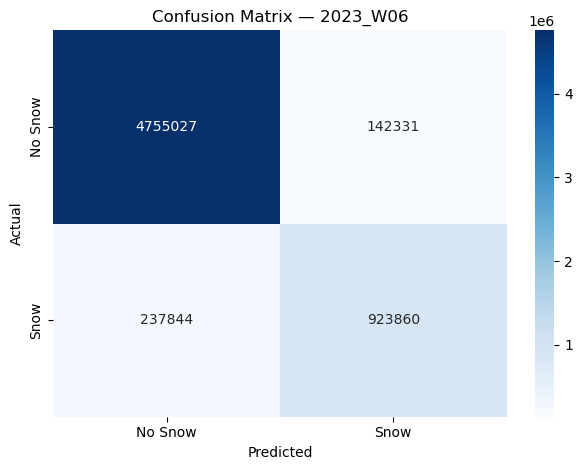

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Train Random Forest
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X, y)
y_pred = clf.predict(X)

# === Evaluation metrics
print(f"\n✅ Model trained for {week}")
print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
print(classification_report(y, y_pred, zero_division=0))

# === Confusion Matrix
cm = confusion_matrix(y, y_pred, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Snow", "Snow"],
            yticklabels=["No Snow", "Snow"])
plt.title(f"Confusion Matrix — {week}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import rasterio
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# === Week and File Paths
week = "2023_W06"
base = r"D:/Geoinformatics Project/Data/Processed/CLIPPED"
paths = {
    "MODIS": f"{base}/MODIS/{week}.tif",  # Label
    "GFSC":  f"{base}/GFSC/{week}.tif",
    "S2":    f"{base}/S2/{week}.tif",
    "S3":    f"{base}/S3/{week}.tif",
}

# === Load Raster Function
def load_raster(path):
    with rasterio.open(path) as src:
        arr = src.read(1).astype(np.float32)
        arr[arr == 255] = np.nan
        return arr

# === Load MODIS Labels
modis = load_raster(paths["MODIS"])

# === Loop through each product
for name in ["GFSC", "S2", "S3"]:
    product = load_raster(paths[name])
    
    # Valid pixels: where both MODIS and product are defined
    valid = ~np.isnan(modis) & ~np.isnan(product)
    
    # Features and labels
    X = product[valid].reshape(-1, 1)  # Must be 2D
    y = modis[valid].astype(int)
    
    # Train Random Forest
    clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    
    # Print results
    print(f"\n📊 Product: {name}")
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(classification_report(y, y_pred, zero_division=0, target_names=["No Snow", "Snow"]))



📊 Product: GFSC
Accuracy: 0.9036
              precision    recall  f1-score   support

     No Snow       0.90      0.99      0.94   4897358
        Snow       0.96      0.52      0.67   1161704

    accuracy                           0.90   6059062
   macro avg       0.93      0.76      0.81   6059062
weighted avg       0.91      0.90      0.89   6059062


📊 Product: S2
Accuracy: 0.8947
              precision    recall  f1-score   support

     No Snow       0.89      0.99      0.94   5079743
        Snow       0.94      0.58      0.72   1548458

    accuracy                           0.89   6628201
   macro avg       0.91      0.79      0.83   6628201
weighted avg       0.90      0.89      0.89   6628201


📊 Product: S3
Accuracy: 0.8926
              precision    recall  f1-score   support

     No Snow       0.89      0.97      0.93   5079743
        Snow       0.88      0.62      0.73   1548458

    accuracy                           0.89   6628201
   macro avg       0.89      0

d:\Geoinformatics Project\Snow_Cover_Mapping03\Snow-Cover-Mapping\Snow\snow_processing.py:50: SyntaxWarning: invalid escape sequence '\M'
  ("MODIS", r"path\to\MODIS", False),



📊 Product: GFSC (Logic-Based Classification)
Accuracy: 0.9036
              precision    recall  f1-score   support

     No Snow       0.90      0.99      0.94   4897358
        Snow       0.96      0.52      0.67   1161704

    accuracy                           0.90   6059062
   macro avg       0.93      0.76      0.81   6059062
weighted avg       0.91      0.90      0.89   6059062



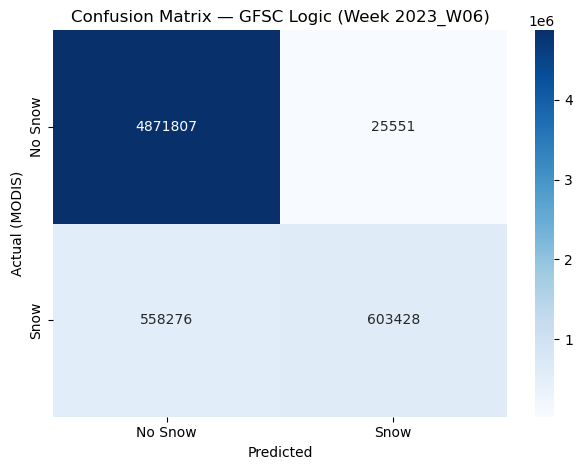


📊 Product: S2 (Logic-Based Classification)
Accuracy: 0.8947
              precision    recall  f1-score   support

     No Snow       0.89      0.99      0.94   5079743
        Snow       0.94      0.58      0.72   1548458

    accuracy                           0.89   6628201
   macro avg       0.91      0.79      0.83   6628201
weighted avg       0.90      0.89      0.89   6628201



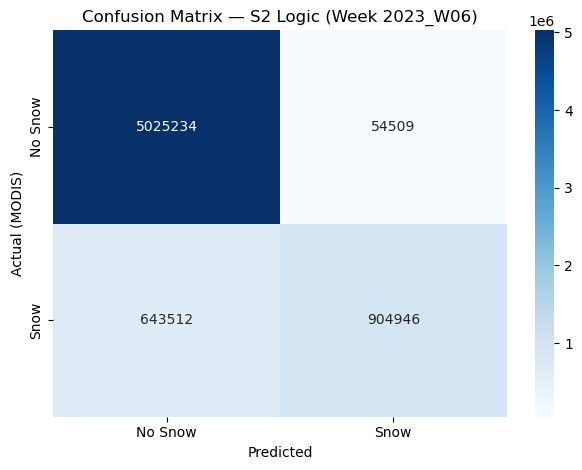


📊 Product: S3 (Logic-Based Classification)
Accuracy: 0.8926
              precision    recall  f1-score   support

     No Snow       0.89      0.97      0.93   5079743
        Snow       0.88      0.62      0.73   1548458

    accuracy                           0.89   6628201
   macro avg       0.89      0.80      0.83   6628201
weighted avg       0.89      0.89      0.89   6628201



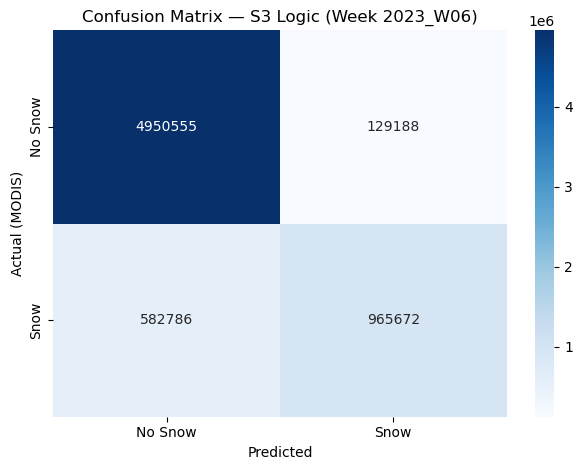

In [4]:
import os
import numpy as np
import rasterio
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from snow_processing import logic_based_mask  # make sure this function is defined properly

# === Configuration
week = "2023_W06"
base_dir = r"D:/Geoinformatics Project/Data/Processed/CLIPPED"

# === Paths to input masks
paths = {
    "MODIS": os.path.join(base_dir, "MODIS", f"{week}.tif"),
    "GFSC":  os.path.join(base_dir, "GFSC",  f"{week}.tif"),
    "S2":    os.path.join(base_dir, "S2",    f"{week}.tif"),
    "S3":    os.path.join(base_dir, "S3",    f"{week}.tif"),
}

# === Load MODIS reference
with rasterio.open(paths["MODIS"]) as src:
    modis = src.read(1).astype(np.float32)
    modis[modis == 255] = np.nan

# === Function to load one mask
def load_mask(path):
    with rasterio.open(path) as src:
        data = src.read(1).astype(np.float32)
        data[data == 255] = np.nan
    return data

# === Evaluate each product's logic-based classification individually
for product in ["GFSC", "S2", "S3"]:
    print(f"\n📊 Product: {product} (Logic-Based Classification)")
    
    # Load mask
    product_mask = load_mask(paths[product])
    
    # Apply logic: returns 1 (snow), 0 (no snow), np.nan (nodata)
    logic_result = logic_based_mask(product_mask)
    
    # Evaluate against MODIS
    valid_mask = ~np.isnan(modis) & ~np.isnan(logic_result)
    y_true = modis[valid_mask].astype(int)
    y_pred = logic_result[valid_mask].astype(int)
    
    # Print metrics
    acc = np.mean(y_true == y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred, target_names=["No Snow", "Snow"], zero_division=0))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Snow", "Snow"],
                yticklabels=["No Snow", "Snow"])
    plt.title(f"Confusion Matrix — {product} Logic (Week {week})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual (MODIS)")
    plt.tight_layout()
    plt.show()


In [ ]:
from snow_processing import run_regression_batch

modis_dir     = r"D:/Geoinformatics Project/Data/Processed/WEEKLY/MODIS"
aligned_base  = r"D:/Geoinformatics Project/Data/Processed/ALIGNED"
reg_output    = r"D:/Geoinformatics Project/Data/Processed/Results/regression_allweeks.csv"
scatter_output = r"D:/Geoinformatics Project/Data/Processed/Results/scatter_week_2023_W06.csv"

common_weeks = [
    '2022_W02','2022_W04','2022_W06','2022_W07','2022_W08',
    '2022_W09','2022_W10','2022_W11','2022_W12','2022_W44',
    '2022_W47','2022_W49','2022_W50',
    '2023_W04','2023_W06','2023_W08','2023_W09','2023_W10',
    '2023_W11','2023_W13','2023_W14','2023_W15','2023_W17',
]
products = ["GFSC", "S2", "S3"]

df_reg = run_regression_batch(
    modis_dir     = modis_dir,
    aligned_base  = aligned_base,
    products      = products,
    common_weeks  = common_weeks,
    sample_limit  = 500_000,
    scatter_output = scatter_output
)

df_reg.to_csv(reg_output, index=False)
print("✅ Regression results saved.")
